The Tennis Tournament in 2019
-- 

Introduction

- Our group's topic is about the tennis tournaments and players involved. There are many players from different regions with a wide range of ages and skills competing to win. These players are ranked based on their capabilities.

- In the data analysis, our group wants to predict **How a player's age, aces and serve points relates to the number of matches they won 2019 tournaments**.
  
- The dataset is about **Game Results for Top 500 Players from 2017-2019** for many tennis tournaments, which contains various tennis player's information such as rank, age, etc. And for our prediction, we are only containing the **All tournaments** in **2019** for answering the question. We are using the tournament date, winner's average age, name, aces, and serve points. 

New names:
• `` -> `...1`
Rows: 6866 Columns: 50
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): tourney_id, tourney_name, surface, tourney_level, winner_seed, win...
dbl (34): ...1, draw_size, tourney_date, match_num, winner_id, winner_ht, wi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


observations,na_vals
<int>,<int>
190,94


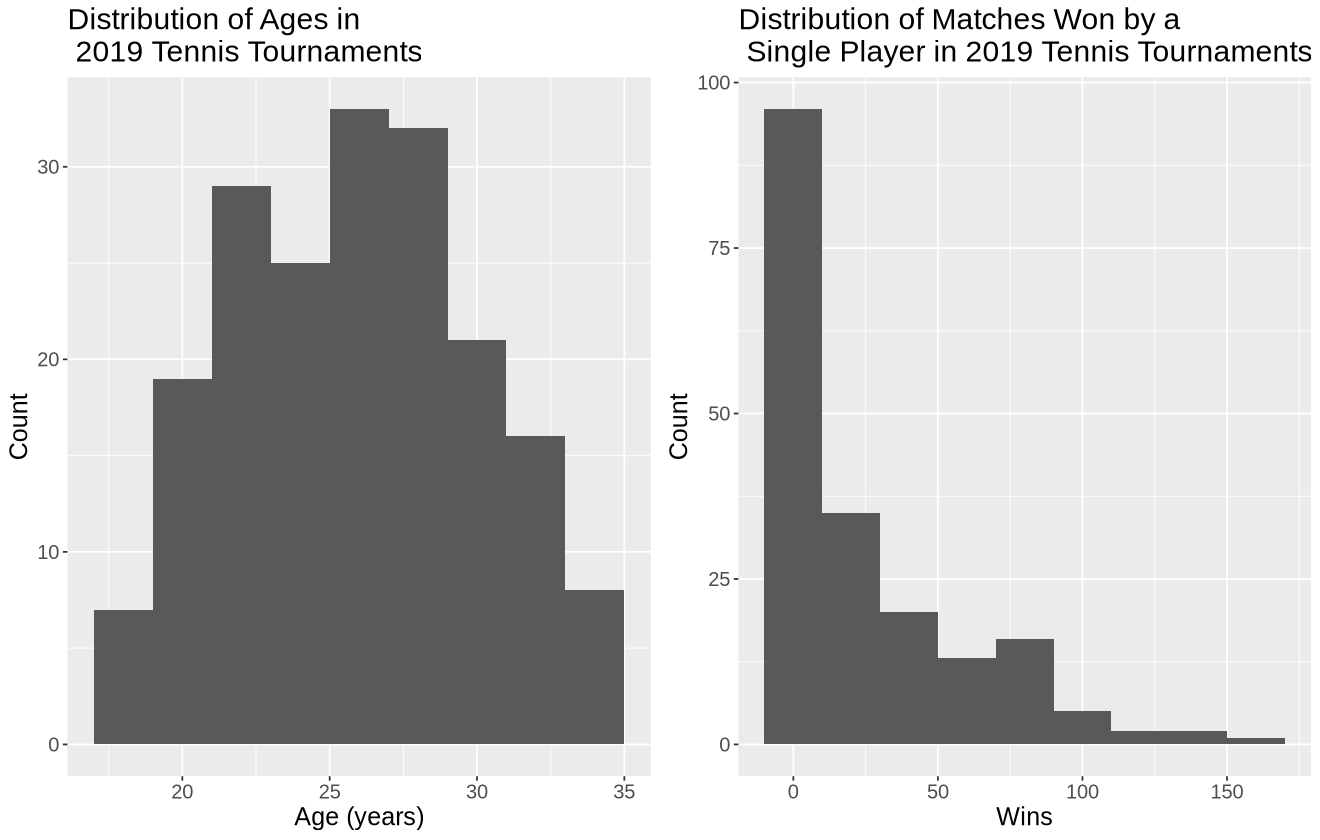

In [75]:
#Premilinary Data Analysis
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)

set.seed(1)
atp <- read_csv("data/atp2017-2019.csv") |>
    select(tourney_date, winner_name, winner_age, w_ace, w_svpt) |>
    filter(tourney_date > 2019000)

#We each row of the data frame to have the winner's name, and a column for thier aces, serve points, wins
# and average ages.

#Create a data frame with the total aces and serve points for each player
atp_points <- atp |>
    group_by(winner_name) |>
    summarize(aces = sum(w_ace), serve_points = sum(w_svpt))

#Create a vector with the number of wins for each player
atp_wins <- atp |>
    group_by(winner_name) |>
    summarize(wins = n()) |>
    pull(wins)

#Create a vector with the average age of each player. Since the age variable in this dataset has many
#decimal places take the average age of a player over the year.
atp_age <- atp |>
    group_by(winner_name) |>
    summarize(age = mean(winner_age)) |>
    mutate(age = round(age, 0)) |>
    pull(age)

#Combine into one data frame
atp_data <-  bind_cols(atp_points, wins = atp_wins) |>
    bind_cols(age = atp_age)
#atp_data

#Split the data
atp_split <- initial_split(atp_data, prop = 0.75, strata = wins)
atp_training <- training(atp_split)
atp_testing <- testing(atp_split)

#Constructing useful table out of training data (number of observations / missing values for each variable)
atp_missing <- count(atp_training, name = "observations") |>
    mutate(na_vals = sum(is.na(atp_training)))
atp_missing

#Age distribution visualization
options(repr.plot.height = 7, repr.plot.width = 11)
age_hist <- ggplot(atp_training, aes(x = age)) +
    geom_histogram(binwidth = 2) +
    labs(x = "Age (years)", y = "Count",
         title = "Distribution of Ages in \n 2019 Tennis Tournaments") +
    theme(text = element_text(size = 15))
win_hist <- ggplot(atp_training, aes(x = wins)) +
    geom_histogram(binwidth = 20) +
    labs(x = "Wins", y = "Count",
     title = "Distribution of Matches Won by a \n Single Player in 2019 Tennis Tournaments") +
    theme(text = element_text(size = 15))
plot_grid(age_hist, win_hist, ncol = 2)

**Methods**

To investigate the expected wins across several age groups for major tennis tournaments in 2019, we will employ a regression model. To do this we will split the data into a training and testing set to ensure the model is accuract. We will use K-nearest neighbours regression to construct a model, train it with the training data set, and evaluate its performance using cross-validation.

For this analysis, we will focus on the following columns from the data set based in 2019: tourney_datee, winner_a, w_ace, w_svpt. Using the predictor variabsle a, aces, and serve pointsg t the regression model will predict thexpected number of wins a player will get based on their age, aces and number of serve pointsem.



**Expected outcomes and significance**

We anticipate our regression model will accurately predict the expected number of wins players will get across a variety of age groups in major tournaments. 

Understanding ese valuesewillan provide valuable insigts into the performance of athletewith n regard to their age. This model can aid players, coaches, and analysts in strategizing training regimes, player selection, and scheduling.

Future investigations could explore the impact of additional variables to create more accuracy in determining expected winsrate of an age group suchthe number of double faults or saved break pointsaces with respect to age. Furthermore, extending the set to include other major tournaments in the from several years could a more comprehensive understanding of age-related performance trends in professional tennis.
